In [1]:
import tensorflow as tf
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%load_ext tensorboard.notebook

In [2]:
A = 1
N = 100
epochs = 50000
batch_size = 20
Xdata = np.arange(0, 1, 1/N).reshape((N,1))
Ydata = np.arange(0, 1, 1/N).reshape((N,1))

In [3]:
def get_batch(xdata, ydata, size):
    length = len(xdata)
    for i in range(0,length//size):
        idx = i*size + np.random.randint(0,10,(1))[0]
        yield xdata[idx:idx+size], ydata[idx:idx+size]

In [4]:
X = tf.placeholder(float, [None, 1], name='inputX')
Y = tf.placeholder(float, [None, 1], name='inputY')

weights = {
    'wx': tf.Variable(tf.random_normal([1,100])),
    'wy':tf.Variable(tf.random_normal([1,100])),
    'wout': tf.Variable(tf.random_normal([100,1]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([100])),
    'bout': tf.Variable(tf.random_normal([1]))
}

layer1 = tf.add(tf.add(tf.matmul(X, weights['wx']),tf.matmul(Y, weights['wy'])), biases['b1'])
layer1 = tf.nn.sigmoid(layer1)
Nout = tf.add(tf.matmul(layer1, weights['wout']), biases['bout'])

dNdX = tf.gradients(Nout,X)
dNdY = tf.gradients(Nout,Y)
d2NdX2 = tf.gradients(tf.gradients(Nout,X),X)
d2NdY2 = tf.gradients(tf.gradients(Nout,Y),Y)
cost = tf.reduce_mean(tf.square(-(np.pi)**2*Y*tf.math.sin(np.pi*X)+Y*(Y-1)*(2*Nout+(4*X-2)*dNdX+X*(X-1)*d2NdX2)+
                                X*(X-1)*(2*Nout+(4*Y-2)*dNdY+Y*(Y-1)*d2NdY2) ))
optimizer = tf.train.AdamOptimizer(learning_rate=0.0001).minimize(cost)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(epochs):
        epoch_loss = 0
        for inputX, inputY in get_batch(Xdata, Ydata, batch_size):
            _, loss = sess.run([optimizer, cost], feed_dict={X:inputX, Y:inputY})
            epoch_loss += loss
        if (epoch%10 == 0):
            print('Epoch', epoch, 'completed out of', epochs, 'with a loss of ', loss)

    saver = tf.train.Saver()
    saver.save(sess, 'my_test_model')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 0 completed out of 50000 with a loss of  4.439218
Epoch 10 completed out of 50000 with a loss of  6.340924
Epoch 20 completed out of 50000 with a loss of  4.6402793
Epoch 30 completed out of 50000 with a loss of  2.7756665
Epoch 40 completed out of 50000 with a loss of  2.9584172
Epoch 50 completed out of 50000 with a loss of  4.42864
Epoch 60 completed out of 50000 with a loss of  4.742856
Epoch 70 completed out of 50000 with a loss of  3.6275
Epoch 80 completed out of 50000 with a loss of  4.174233
Epoch 90 completed out of 50000 with a loss of  2.7086816
Epoch 100 completed out of 50000 with a loss of  2.32718
Epoch 110 completed out of 50000 with a loss of  3.5496666
Epoch 120 completed out of 50000 with a loss of  2.9849856
Epoch 130 completed out of 50000 with a loss of  1.5942928
Epoch 140 completed out of 50000 with a loss of  2.9041762
Epoch 150 complet

Epoch 1310 completed out of 50000 with a loss of  0.009019458
Epoch 1320 completed out of 50000 with a loss of  0.00797565
Epoch 1330 completed out of 50000 with a loss of  0.006955744
Epoch 1340 completed out of 50000 with a loss of  0.00829928
Epoch 1350 completed out of 50000 with a loss of  0.0062219645
Epoch 1360 completed out of 50000 with a loss of  0.005302188
Epoch 1370 completed out of 50000 with a loss of  0.005384542
Epoch 1380 completed out of 50000 with a loss of  0.006206683
Epoch 1390 completed out of 50000 with a loss of  0.006472673
Epoch 1400 completed out of 50000 with a loss of  0.006362494
Epoch 1410 completed out of 50000 with a loss of  0.0065205432
Epoch 1420 completed out of 50000 with a loss of  0.0066170557
Epoch 1430 completed out of 50000 with a loss of  0.0034498386
Epoch 1440 completed out of 50000 with a loss of  0.005741823
Epoch 1450 completed out of 50000 with a loss of  0.004973239
Epoch 1460 completed out of 50000 with a loss of  0.0056264517
Epoch

Epoch 2620 completed out of 50000 with a loss of  0.00027421734
Epoch 2630 completed out of 50000 with a loss of  0.0003032877
Epoch 2640 completed out of 50000 with a loss of  0.00021669695
Epoch 2650 completed out of 50000 with a loss of  0.00024779164
Epoch 2660 completed out of 50000 with a loss of  0.00030164956
Epoch 2670 completed out of 50000 with a loss of  0.00022533578
Epoch 2680 completed out of 50000 with a loss of  0.00028084958
Epoch 2690 completed out of 50000 with a loss of  0.0002711125
Epoch 2700 completed out of 50000 with a loss of  0.0003661515
Epoch 2710 completed out of 50000 with a loss of  0.00024516342
Epoch 2720 completed out of 50000 with a loss of  0.0003156077
Epoch 2730 completed out of 50000 with a loss of  0.00027127372
Epoch 2740 completed out of 50000 with a loss of  0.00026882667
Epoch 2750 completed out of 50000 with a loss of  0.0002555329
Epoch 2760 completed out of 50000 with a loss of  0.00033102513
Epoch 2770 completed out of 50000 with a loss

Epoch 3910 completed out of 50000 with a loss of  0.00014424986
Epoch 3920 completed out of 50000 with a loss of  0.0002074588
Epoch 3930 completed out of 50000 with a loss of  0.0002335546
Epoch 3940 completed out of 50000 with a loss of  0.00023532925
Epoch 3950 completed out of 50000 with a loss of  0.00014744408
Epoch 3960 completed out of 50000 with a loss of  0.00020269223
Epoch 3970 completed out of 50000 with a loss of  0.00016498417
Epoch 3980 completed out of 50000 with a loss of  0.0001461547
Epoch 3990 completed out of 50000 with a loss of  0.00022974236
Epoch 4000 completed out of 50000 with a loss of  0.00013309899
Epoch 4010 completed out of 50000 with a loss of  0.00020699979
Epoch 4020 completed out of 50000 with a loss of  0.00017764737
Epoch 4030 completed out of 50000 with a loss of  0.00016112124
Epoch 4040 completed out of 50000 with a loss of  0.00016870446
Epoch 4050 completed out of 50000 with a loss of  0.00021066693
Epoch 4060 completed out of 50000 with a lo

Epoch 5220 completed out of 50000 with a loss of  0.00014404173
Epoch 5230 completed out of 50000 with a loss of  9.55772e-05
Epoch 5240 completed out of 50000 with a loss of  0.00013111795
Epoch 5250 completed out of 50000 with a loss of  9.81672e-05
Epoch 5260 completed out of 50000 with a loss of  0.00011689387
Epoch 5270 completed out of 50000 with a loss of  0.00012842937
Epoch 5280 completed out of 50000 with a loss of  9.514763e-05
Epoch 5290 completed out of 50000 with a loss of  0.000110377594
Epoch 5300 completed out of 50000 with a loss of  9.878046e-05
Epoch 5310 completed out of 50000 with a loss of  9.5810654e-05
Epoch 5320 completed out of 50000 with a loss of  0.00013671664
Epoch 5330 completed out of 50000 with a loss of  0.000110331064
Epoch 5340 completed out of 50000 with a loss of  9.620376e-05
Epoch 5350 completed out of 50000 with a loss of  0.00010886171
Epoch 5360 completed out of 50000 with a loss of  9.003347e-05
Epoch 5370 completed out of 50000 with a loss 

Epoch 6520 completed out of 50000 with a loss of  7.73171e-05
Epoch 6530 completed out of 50000 with a loss of  7.403741e-05
Epoch 6540 completed out of 50000 with a loss of  9.2598806e-05
Epoch 6550 completed out of 50000 with a loss of  7.592885e-05
Epoch 6560 completed out of 50000 with a loss of  7.259164e-05
Epoch 6570 completed out of 50000 with a loss of  0.00011133863
Epoch 6580 completed out of 50000 with a loss of  0.000100922145
Epoch 6590 completed out of 50000 with a loss of  7.269587e-05
Epoch 6600 completed out of 50000 with a loss of  7.822729e-05
Epoch 6610 completed out of 50000 with a loss of  9.600132e-05
Epoch 6620 completed out of 50000 with a loss of  7.445387e-05
Epoch 6630 completed out of 50000 with a loss of  7.553366e-05
Epoch 6640 completed out of 50000 with a loss of  0.00010322674
Epoch 6650 completed out of 50000 with a loss of  9.376018e-05
Epoch 6660 completed out of 50000 with a loss of  8.218906e-05
Epoch 6670 completed out of 50000 with a loss of  7

Epoch 7850 completed out of 50000 with a loss of  9.052382e-05
Epoch 7860 completed out of 50000 with a loss of  7.7041055e-05
Epoch 7870 completed out of 50000 with a loss of  6.124698e-05
Epoch 7880 completed out of 50000 with a loss of  6.1002174e-05
Epoch 7890 completed out of 50000 with a loss of  8.6434964e-05
Epoch 7900 completed out of 50000 with a loss of  9.753448e-05
Epoch 7910 completed out of 50000 with a loss of  6.149779e-05
Epoch 7920 completed out of 50000 with a loss of  6.666655e-05
Epoch 7930 completed out of 50000 with a loss of  6.770529e-05
Epoch 7940 completed out of 50000 with a loss of  6.898272e-05
Epoch 7950 completed out of 50000 with a loss of  8.7635526e-05
Epoch 7960 completed out of 50000 with a loss of  8.317723e-05
Epoch 7970 completed out of 50000 with a loss of  6.105058e-05
Epoch 7980 completed out of 50000 with a loss of  9.696302e-05
Epoch 7990 completed out of 50000 with a loss of  7.9468424e-05
Epoch 8000 completed out of 50000 with a loss of  

Epoch 9180 completed out of 50000 with a loss of  6.298299e-05
Epoch 9190 completed out of 50000 with a loss of  5.298725e-05
Epoch 9200 completed out of 50000 with a loss of  8.034988e-05
Epoch 9210 completed out of 50000 with a loss of  5.8033467e-05
Epoch 9220 completed out of 50000 with a loss of  7.4596566e-05
Epoch 9230 completed out of 50000 with a loss of  7.948954e-05
Epoch 9240 completed out of 50000 with a loss of  5.1121624e-05
Epoch 9250 completed out of 50000 with a loss of  8.0139645e-05
Epoch 9260 completed out of 50000 with a loss of  7.559488e-05
Epoch 9270 completed out of 50000 with a loss of  5.9962444e-05
Epoch 9280 completed out of 50000 with a loss of  6.5381995e-05
Epoch 9290 completed out of 50000 with a loss of  4.9517963e-05
Epoch 9300 completed out of 50000 with a loss of  7.7674114e-05
Epoch 9310 completed out of 50000 with a loss of  6.4998705e-05
Epoch 9320 completed out of 50000 with a loss of  5.9881637e-05
Epoch 9330 completed out of 50000 with a loss

Epoch 10490 completed out of 50000 with a loss of  5.7483518e-05
Epoch 10500 completed out of 50000 with a loss of  6.485058e-05
Epoch 10510 completed out of 50000 with a loss of  5.6449866e-05
Epoch 10520 completed out of 50000 with a loss of  4.4559973e-05
Epoch 10530 completed out of 50000 with a loss of  4.8065194e-05
Epoch 10540 completed out of 50000 with a loss of  4.345586e-05
Epoch 10550 completed out of 50000 with a loss of  4.4852353e-05
Epoch 10560 completed out of 50000 with a loss of  6.6279405e-05
Epoch 10570 completed out of 50000 with a loss of  6.120963e-05
Epoch 10580 completed out of 50000 with a loss of  4.3036394e-05
Epoch 10590 completed out of 50000 with a loss of  6.700005e-05
Epoch 10600 completed out of 50000 with a loss of  5.4117623e-05
Epoch 10610 completed out of 50000 with a loss of  5.5334232e-05
Epoch 10620 completed out of 50000 with a loss of  4.8140733e-05
Epoch 10630 completed out of 50000 with a loss of  6.463489e-05
Epoch 10640 completed out of 5

Epoch 11790 completed out of 50000 with a loss of  3.7810503e-05
Epoch 11800 completed out of 50000 with a loss of  3.851658e-05
Epoch 11810 completed out of 50000 with a loss of  5.3295837e-05
Epoch 11820 completed out of 50000 with a loss of  4.5672412e-05
Epoch 11830 completed out of 50000 with a loss of  4.602365e-05
Epoch 11840 completed out of 50000 with a loss of  4.064946e-05
Epoch 11850 completed out of 50000 with a loss of  5.2307278e-05
Epoch 11860 completed out of 50000 with a loss of  3.985481e-05
Epoch 11870 completed out of 50000 with a loss of  3.662696e-05
Epoch 11880 completed out of 50000 with a loss of  4.6707282e-05
Epoch 11890 completed out of 50000 with a loss of  5.8117534e-05
Epoch 11900 completed out of 50000 with a loss of  3.9851926e-05
Epoch 11910 completed out of 50000 with a loss of  4.7977916e-05
Epoch 11920 completed out of 50000 with a loss of  3.6741127e-05
Epoch 11930 completed out of 50000 with a loss of  3.69119e-05
Epoch 11940 completed out of 500

Epoch 13100 completed out of 50000 with a loss of  4.317454e-05
Epoch 13110 completed out of 50000 with a loss of  3.484438e-05
Epoch 13120 completed out of 50000 with a loss of  3.2988115e-05
Epoch 13130 completed out of 50000 with a loss of  4.5404184e-05
Epoch 13140 completed out of 50000 with a loss of  3.14478e-05
Epoch 13150 completed out of 50000 with a loss of  5.0736606e-05
Epoch 13160 completed out of 50000 with a loss of  3.742601e-05
Epoch 13170 completed out of 50000 with a loss of  3.2083586e-05
Epoch 13180 completed out of 50000 with a loss of  4.861547e-05
Epoch 13190 completed out of 50000 with a loss of  4.302751e-05
Epoch 13200 completed out of 50000 with a loss of  3.254057e-05
Epoch 13210 completed out of 50000 with a loss of  3.7771424e-05
Epoch 13220 completed out of 50000 with a loss of  4.1658484e-05
Epoch 13230 completed out of 50000 with a loss of  3.258743e-05
Epoch 13240 completed out of 50000 with a loss of  3.2976463e-05
Epoch 13250 completed out of 50000

Epoch 14400 completed out of 50000 with a loss of  2.8483511e-05
Epoch 14410 completed out of 50000 with a loss of  4.2793374e-05
Epoch 14420 completed out of 50000 with a loss of  2.8712437e-05
Epoch 14430 completed out of 50000 with a loss of  2.7919243e-05
Epoch 14440 completed out of 50000 with a loss of  2.7967584e-05
Epoch 14450 completed out of 50000 with a loss of  2.7698594e-05
Epoch 14460 completed out of 50000 with a loss of  2.7970058e-05
Epoch 14470 completed out of 50000 with a loss of  3.9793256e-05
Epoch 14480 completed out of 50000 with a loss of  2.7071655e-05
Epoch 14490 completed out of 50000 with a loss of  3.1919295e-05
Epoch 14500 completed out of 50000 with a loss of  2.9836767e-05
Epoch 14510 completed out of 50000 with a loss of  3.2038835e-05
Epoch 14520 completed out of 50000 with a loss of  3.86661e-05
Epoch 14530 completed out of 50000 with a loss of  3.3148855e-05
Epoch 14540 completed out of 50000 with a loss of  2.8315233e-05
Epoch 14550 completed out o

Epoch 15700 completed out of 50000 with a loss of  2.5508629e-05
Epoch 15710 completed out of 50000 with a loss of  2.8425167e-05
Epoch 15720 completed out of 50000 with a loss of  2.4234823e-05
Epoch 15730 completed out of 50000 with a loss of  3.131195e-05
Epoch 15740 completed out of 50000 with a loss of  2.4315896e-05
Epoch 15750 completed out of 50000 with a loss of  3.5698853e-05
Epoch 15760 completed out of 50000 with a loss of  2.4186174e-05
Epoch 15770 completed out of 50000 with a loss of  2.4316174e-05
Epoch 15780 completed out of 50000 with a loss of  3.7973794e-05
Epoch 15790 completed out of 50000 with a loss of  2.676715e-05
Epoch 15800 completed out of 50000 with a loss of  2.4021374e-05
Epoch 15810 completed out of 50000 with a loss of  2.4425342e-05
Epoch 15820 completed out of 50000 with a loss of  2.8939812e-05
Epoch 15830 completed out of 50000 with a loss of  2.788256e-05
Epoch 15840 completed out of 50000 with a loss of  2.6250907e-05
Epoch 15850 completed out of

Epoch 17010 completed out of 50000 with a loss of  3.440161e-05
Epoch 17020 completed out of 50000 with a loss of  2.17456e-05
Epoch 17030 completed out of 50000 with a loss of  3.099242e-05
Epoch 17040 completed out of 50000 with a loss of  2.8459317e-05
Epoch 17050 completed out of 50000 with a loss of  3.124042e-05
Epoch 17060 completed out of 50000 with a loss of  2.6061374e-05
Epoch 17070 completed out of 50000 with a loss of  2.2819273e-05
Epoch 17080 completed out of 50000 with a loss of  2.7404487e-05
Epoch 17090 completed out of 50000 with a loss of  2.1036649e-05
Epoch 17100 completed out of 50000 with a loss of  2.6662638e-05
Epoch 17110 completed out of 50000 with a loss of  3.1469208e-05
Epoch 17120 completed out of 50000 with a loss of  2.2639799e-05
Epoch 17130 completed out of 50000 with a loss of  2.2070453e-05
Epoch 17140 completed out of 50000 with a loss of  2.2033613e-05
Epoch 17150 completed out of 50000 with a loss of  3.4317138e-05
Epoch 17160 completed out of 5

Epoch 18290 completed out of 50000 with a loss of  1.9144125e-05
Epoch 18300 completed out of 50000 with a loss of  2.5381121e-05
Epoch 18310 completed out of 50000 with a loss of  2.5692541e-05
Epoch 18320 completed out of 50000 with a loss of  1.9327777e-05
Epoch 18330 completed out of 50000 with a loss of  1.8982222e-05
Epoch 18340 completed out of 50000 with a loss of  1.897839e-05
Epoch 18350 completed out of 50000 with a loss of  1.8907456e-05
Epoch 18360 completed out of 50000 with a loss of  2.7087872e-05
Epoch 18370 completed out of 50000 with a loss of  2.171226e-05
Epoch 18380 completed out of 50000 with a loss of  2.1178657e-05
Epoch 18390 completed out of 50000 with a loss of  2.7099491e-05
Epoch 18400 completed out of 50000 with a loss of  1.9217629e-05
Epoch 18410 completed out of 50000 with a loss of  2.0190424e-05
Epoch 18420 completed out of 50000 with a loss of  2.1826292e-05
Epoch 18430 completed out of 50000 with a loss of  2.9699417e-05
Epoch 18440 completed out o

Epoch 19570 completed out of 50000 with a loss of  2.0626665e-05
Epoch 19580 completed out of 50000 with a loss of  1.7209355e-05
Epoch 19590 completed out of 50000 with a loss of  1.8020277e-05
Epoch 19600 completed out of 50000 with a loss of  1.8380033e-05
Epoch 19610 completed out of 50000 with a loss of  1.7887003e-05
Epoch 19620 completed out of 50000 with a loss of  2.4572684e-05
Epoch 19630 completed out of 50000 with a loss of  1.7462111e-05
Epoch 19640 completed out of 50000 with a loss of  1.8731034e-05
Epoch 19650 completed out of 50000 with a loss of  1.7355987e-05
Epoch 19660 completed out of 50000 with a loss of  1.7844452e-05
Epoch 19670 completed out of 50000 with a loss of  1.8299574e-05
Epoch 19680 completed out of 50000 with a loss of  2.1177097e-05
Epoch 19690 completed out of 50000 with a loss of  2.0077798e-05
Epoch 19700 completed out of 50000 with a loss of  2.1292142e-05
Epoch 19710 completed out of 50000 with a loss of  1.9894194e-05
Epoch 19720 completed out

Epoch 20860 completed out of 50000 with a loss of  1.6580254e-05
Epoch 20870 completed out of 50000 with a loss of  1.720456e-05
Epoch 20880 completed out of 50000 with a loss of  2.0836835e-05
Epoch 20890 completed out of 50000 with a loss of  2.4115878e-05
Epoch 20900 completed out of 50000 with a loss of  1.577378e-05
Epoch 20910 completed out of 50000 with a loss of  1.6237398e-05
Epoch 20920 completed out of 50000 with a loss of  1.6257838e-05
Epoch 20930 completed out of 50000 with a loss of  1.9199706e-05
Epoch 20940 completed out of 50000 with a loss of  1.6020811e-05
Epoch 20950 completed out of 50000 with a loss of  1.5574029e-05
Epoch 20960 completed out of 50000 with a loss of  1.605253e-05
Epoch 20970 completed out of 50000 with a loss of  1.558032e-05
Epoch 20980 completed out of 50000 with a loss of  2.1503587e-05
Epoch 20990 completed out of 50000 with a loss of  1.6856522e-05
Epoch 21000 completed out of 50000 with a loss of  1.6007922e-05
Epoch 21010 completed out of 

Epoch 22160 completed out of 50000 with a loss of  1.5393081e-05
Epoch 22170 completed out of 50000 with a loss of  1.455314e-05
Epoch 22180 completed out of 50000 with a loss of  1.478982e-05
Epoch 22190 completed out of 50000 with a loss of  1.9869804e-05
Epoch 22200 completed out of 50000 with a loss of  1.5383399e-05
Epoch 22210 completed out of 50000 with a loss of  1.4946576e-05
Epoch 22220 completed out of 50000 with a loss of  1.4505225e-05
Epoch 22230 completed out of 50000 with a loss of  1.4913296e-05
Epoch 22240 completed out of 50000 with a loss of  1.5405833e-05
Epoch 22250 completed out of 50000 with a loss of  1.4613734e-05
Epoch 22260 completed out of 50000 with a loss of  1.9813278e-05
Epoch 22270 completed out of 50000 with a loss of  1.8932476e-05
Epoch 22280 completed out of 50000 with a loss of  1.4565581e-05
Epoch 22290 completed out of 50000 with a loss of  1.4857758e-05
Epoch 22300 completed out of 50000 with a loss of  1.4987178e-05
Epoch 22310 completed out o

Epoch 23450 completed out of 50000 with a loss of  1.6997212e-05
Epoch 23460 completed out of 50000 with a loss of  1.3921683e-05
Epoch 23470 completed out of 50000 with a loss of  1.3204729e-05
Epoch 23480 completed out of 50000 with a loss of  1.7009686e-05
Epoch 23490 completed out of 50000 with a loss of  1.4384564e-05
Epoch 23500 completed out of 50000 with a loss of  1.826259e-05
Epoch 23510 completed out of 50000 with a loss of  1.5214954e-05
Epoch 23520 completed out of 50000 with a loss of  1.4859469e-05
Epoch 23530 completed out of 50000 with a loss of  1.3853081e-05
Epoch 23540 completed out of 50000 with a loss of  1.6447093e-05
Epoch 23550 completed out of 50000 with a loss of  1.4218107e-05
Epoch 23560 completed out of 50000 with a loss of  1.3210183e-05
Epoch 23570 completed out of 50000 with a loss of  1.7605642e-05
Epoch 23580 completed out of 50000 with a loss of  1.4678906e-05
Epoch 23590 completed out of 50000 with a loss of  1.3557768e-05
Epoch 23600 completed out 

Epoch 24750 completed out of 50000 with a loss of  1.2394006e-05
Epoch 24760 completed out of 50000 with a loss of  1.2460765e-05
Epoch 24770 completed out of 50000 with a loss of  1.2724043e-05
Epoch 24780 completed out of 50000 with a loss of  1.261024e-05
Epoch 24790 completed out of 50000 with a loss of  1.4934049e-05
Epoch 24800 completed out of 50000 with a loss of  1.4160986e-05
Epoch 24810 completed out of 50000 with a loss of  1.4569789e-05
Epoch 24820 completed out of 50000 with a loss of  1.3081173e-05
Epoch 24830 completed out of 50000 with a loss of  1.1979476e-05
Epoch 24840 completed out of 50000 with a loss of  1.27804215e-05
Epoch 24850 completed out of 50000 with a loss of  1.3820524e-05
Epoch 24860 completed out of 50000 with a loss of  1.2851249e-05
Epoch 24870 completed out of 50000 with a loss of  1.6764521e-05
Epoch 24880 completed out of 50000 with a loss of  1.2164711e-05
Epoch 24890 completed out of 50000 with a loss of  1.3572456e-05
Epoch 24900 completed out

Epoch 26020 completed out of 50000 with a loss of  1.7949227e-05
Epoch 26030 completed out of 50000 with a loss of  1.0945023e-05
Epoch 26040 completed out of 50000 with a loss of  1.4084497e-05
Epoch 26050 completed out of 50000 with a loss of  1.16054725e-05
Epoch 26060 completed out of 50000 with a loss of  1.2044494e-05
Epoch 26070 completed out of 50000 with a loss of  1.5310177e-05
Epoch 26080 completed out of 50000 with a loss of  1.2191433e-05
Epoch 26090 completed out of 50000 with a loss of  1.40069105e-05
Epoch 26100 completed out of 50000 with a loss of  1.6477035e-05
Epoch 26110 completed out of 50000 with a loss of  1.3249898e-05
Epoch 26120 completed out of 50000 with a loss of  1.6975597e-05
Epoch 26130 completed out of 50000 with a loss of  1.3327967e-05
Epoch 26140 completed out of 50000 with a loss of  1.42408635e-05
Epoch 26150 completed out of 50000 with a loss of  1.677464e-05
Epoch 26160 completed out of 50000 with a loss of  1.2106959e-05
Epoch 26170 completed o

Epoch 27300 completed out of 50000 with a loss of  1.387941e-05
Epoch 27310 completed out of 50000 with a loss of  1.2889912e-05
Epoch 27320 completed out of 50000 with a loss of  1.1347402e-05
Epoch 27330 completed out of 50000 with a loss of  1.1081712e-05
Epoch 27340 completed out of 50000 with a loss of  1.1402193e-05
Epoch 27350 completed out of 50000 with a loss of  1.31046645e-05
Epoch 27360 completed out of 50000 with a loss of  1.1123532e-05
Epoch 27370 completed out of 50000 with a loss of  1.0371484e-05
Epoch 27380 completed out of 50000 with a loss of  1.3592521e-05
Epoch 27390 completed out of 50000 with a loss of  1.1658631e-05
Epoch 27400 completed out of 50000 with a loss of  1.6825457e-05
Epoch 27410 completed out of 50000 with a loss of  1.3998053e-05
Epoch 27420 completed out of 50000 with a loss of  1.408996e-05
Epoch 27430 completed out of 50000 with a loss of  1.1234018e-05
Epoch 27440 completed out of 50000 with a loss of  1.2741785e-05
Epoch 27450 completed out 

Epoch 28570 completed out of 50000 with a loss of  1.3903588e-05
Epoch 28580 completed out of 50000 with a loss of  1.3939029e-05
Epoch 28590 completed out of 50000 with a loss of  1.0207249e-05
Epoch 28600 completed out of 50000 with a loss of  1.458566e-05
Epoch 28610 completed out of 50000 with a loss of  1.1067992e-05
Epoch 28620 completed out of 50000 with a loss of  1.1481449e-05
Epoch 28630 completed out of 50000 with a loss of  1.44056885e-05
Epoch 28640 completed out of 50000 with a loss of  1.1430058e-05
Epoch 28650 completed out of 50000 with a loss of  1.1402001e-05
Epoch 28660 completed out of 50000 with a loss of  1.3436387e-05
Epoch 28670 completed out of 50000 with a loss of  9.9286335e-06
Epoch 28680 completed out of 50000 with a loss of  1.0067773e-05
Epoch 28690 completed out of 50000 with a loss of  1.0725168e-05
Epoch 28700 completed out of 50000 with a loss of  1.0732134e-05
Epoch 28710 completed out of 50000 with a loss of  1.0568784e-05
Epoch 28720 completed out

Epoch 29830 completed out of 50000 with a loss of  1.0036723e-05
Epoch 29840 completed out of 50000 with a loss of  1.0092364e-05
Epoch 29850 completed out of 50000 with a loss of  1.2470842e-05
Epoch 29860 completed out of 50000 with a loss of  1.4135309e-05
Epoch 29870 completed out of 50000 with a loss of  9.469623e-06
Epoch 29880 completed out of 50000 with a loss of  9.721081e-06
Epoch 29890 completed out of 50000 with a loss of  9.9369245e-06
Epoch 29900 completed out of 50000 with a loss of  1.01489395e-05
Epoch 29910 completed out of 50000 with a loss of  1.08269005e-05
Epoch 29920 completed out of 50000 with a loss of  9.786946e-06
Epoch 29930 completed out of 50000 with a loss of  1.2158733e-05
Epoch 29940 completed out of 50000 with a loss of  1.2305314e-05
Epoch 29950 completed out of 50000 with a loss of  9.82796e-06
Epoch 29960 completed out of 50000 with a loss of  9.949528e-06
Epoch 29970 completed out of 50000 with a loss of  1.1054525e-05
Epoch 29980 completed out of 

Epoch 31150 completed out of 50000 with a loss of  1.1985331e-05
Epoch 31160 completed out of 50000 with a loss of  9.40333e-06
Epoch 31170 completed out of 50000 with a loss of  1.1041503e-05
Epoch 31180 completed out of 50000 with a loss of  9.352836e-06
Epoch 31190 completed out of 50000 with a loss of  9.260792e-06
Epoch 31200 completed out of 50000 with a loss of  1.0562244e-05
Epoch 31210 completed out of 50000 with a loss of  9.922131e-06
Epoch 31220 completed out of 50000 with a loss of  9.1602915e-06
Epoch 31230 completed out of 50000 with a loss of  9.612146e-06
Epoch 31240 completed out of 50000 with a loss of  8.977763e-06
Epoch 31250 completed out of 50000 with a loss of  1.22150195e-05
Epoch 31260 completed out of 50000 with a loss of  9.958872e-06
Epoch 31270 completed out of 50000 with a loss of  9.140449e-06
Epoch 31280 completed out of 50000 with a loss of  1.0401109e-05
Epoch 31290 completed out of 50000 with a loss of  9.740784e-06
Epoch 31300 completed out of 50000

Epoch 32460 completed out of 50000 with a loss of  9.628545e-06
Epoch 32470 completed out of 50000 with a loss of  8.941024e-06
Epoch 32480 completed out of 50000 with a loss of  9.683967e-06
Epoch 32490 completed out of 50000 with a loss of  8.510521e-06
Epoch 32500 completed out of 50000 with a loss of  9.141525e-06
Epoch 32510 completed out of 50000 with a loss of  8.844534e-06
Epoch 32520 completed out of 50000 with a loss of  9.635694e-06
Epoch 32530 completed out of 50000 with a loss of  1.0175913e-05
Epoch 32540 completed out of 50000 with a loss of  9.672215e-06
Epoch 32550 completed out of 50000 with a loss of  8.846688e-06
Epoch 32560 completed out of 50000 with a loss of  8.881483e-06
Epoch 32570 completed out of 50000 with a loss of  9.2938935e-06
Epoch 32580 completed out of 50000 with a loss of  8.809442e-06
Epoch 32590 completed out of 50000 with a loss of  9.000697e-06
Epoch 32600 completed out of 50000 with a loss of  8.980425e-06
Epoch 32610 completed out of 50000 wit

Epoch 33770 completed out of 50000 with a loss of  8.762628e-06
Epoch 33780 completed out of 50000 with a loss of  9.28619e-06
Epoch 33790 completed out of 50000 with a loss of  8.8616525e-06
Epoch 33800 completed out of 50000 with a loss of  8.578337e-06
Epoch 33810 completed out of 50000 with a loss of  1.0417778e-05
Epoch 33820 completed out of 50000 with a loss of  9.110666e-06
Epoch 33830 completed out of 50000 with a loss of  8.526226e-06
Epoch 33840 completed out of 50000 with a loss of  8.591493e-06
Epoch 33850 completed out of 50000 with a loss of  9.018848e-06
Epoch 33860 completed out of 50000 with a loss of  1.0639034e-05
Epoch 33870 completed out of 50000 with a loss of  9.218137e-06
Epoch 33880 completed out of 50000 with a loss of  1.108375e-05
Epoch 33890 completed out of 50000 with a loss of  8.3966825e-06
Epoch 33900 completed out of 50000 with a loss of  8.61209e-06
Epoch 33910 completed out of 50000 with a loss of  8.894675e-06
Epoch 33920 completed out of 50000 wit

Epoch 35100 completed out of 50000 with a loss of  9.473468e-06
Epoch 35110 completed out of 50000 with a loss of  9.612716e-06
Epoch 35120 completed out of 50000 with a loss of  8.833287e-06
Epoch 35130 completed out of 50000 with a loss of  8.382457e-06
Epoch 35140 completed out of 50000 with a loss of  1.0579058e-05
Epoch 35150 completed out of 50000 with a loss of  1.1031322e-05
Epoch 35160 completed out of 50000 with a loss of  8.385061e-06
Epoch 35170 completed out of 50000 with a loss of  8.241095e-06
Epoch 35180 completed out of 50000 with a loss of  8.774963e-06
Epoch 35190 completed out of 50000 with a loss of  8.638572e-06
Epoch 35200 completed out of 50000 with a loss of  1.0942203e-05
Epoch 35210 completed out of 50000 with a loss of  8.178964e-06
Epoch 35220 completed out of 50000 with a loss of  1.0357267e-05
Epoch 35230 completed out of 50000 with a loss of  8.142859e-06
Epoch 35240 completed out of 50000 with a loss of  7.719216e-06
Epoch 35250 completed out of 50000 w

Epoch 36410 completed out of 50000 with a loss of  8.057953e-06
Epoch 36420 completed out of 50000 with a loss of  8.307534e-06
Epoch 36430 completed out of 50000 with a loss of  1.074268e-05
Epoch 36440 completed out of 50000 with a loss of  7.890998e-06
Epoch 36450 completed out of 50000 with a loss of  7.983267e-06
Epoch 36460 completed out of 50000 with a loss of  7.961469e-06
Epoch 36470 completed out of 50000 with a loss of  8.41793e-06
Epoch 36480 completed out of 50000 with a loss of  7.857799e-06
Epoch 36490 completed out of 50000 with a loss of  8.754183e-06
Epoch 36500 completed out of 50000 with a loss of  7.749261e-06
Epoch 36510 completed out of 50000 with a loss of  9.589631e-06
Epoch 36520 completed out of 50000 with a loss of  7.774193e-06
Epoch 36530 completed out of 50000 with a loss of  7.111839e-06
Epoch 36540 completed out of 50000 with a loss of  8.164362e-06
Epoch 36550 completed out of 50000 with a loss of  8.014097e-06
Epoch 36560 completed out of 50000 with a

Epoch 37700 completed out of 50000 with a loss of  8.045245e-06
Epoch 37710 completed out of 50000 with a loss of  9.010725e-06
Epoch 37720 completed out of 50000 with a loss of  1.1099019e-05
Epoch 37730 completed out of 50000 with a loss of  7.4414606e-06
Epoch 37740 completed out of 50000 with a loss of  7.791582e-06
Epoch 37750 completed out of 50000 with a loss of  8.1423805e-06
Epoch 37760 completed out of 50000 with a loss of  9.05978e-06
Epoch 37770 completed out of 50000 with a loss of  7.148417e-06
Epoch 37780 completed out of 50000 with a loss of  7.627859e-06
Epoch 37790 completed out of 50000 with a loss of  7.835635e-06
Epoch 37800 completed out of 50000 with a loss of  7.575243e-06
Epoch 37810 completed out of 50000 with a loss of  7.92819e-06
Epoch 37820 completed out of 50000 with a loss of  8.009495e-06
Epoch 37830 completed out of 50000 with a loss of  7.1388736e-06
Epoch 37840 completed out of 50000 with a loss of  7.876034e-06
Epoch 37850 completed out of 50000 wit

Epoch 39010 completed out of 50000 with a loss of  7.282928e-06
Epoch 39020 completed out of 50000 with a loss of  1.1360442e-05
Epoch 39030 completed out of 50000 with a loss of  7.892343e-06
Epoch 39040 completed out of 50000 with a loss of  7.699497e-06
Epoch 39050 completed out of 50000 with a loss of  7.149035e-06
Epoch 39060 completed out of 50000 with a loss of  8.063846e-06
Epoch 39070 completed out of 50000 with a loss of  6.8085023e-06
Epoch 39080 completed out of 50000 with a loss of  7.610997e-06
Epoch 39090 completed out of 50000 with a loss of  8.29389e-06
Epoch 39100 completed out of 50000 with a loss of  7.884579e-06
Epoch 39110 completed out of 50000 with a loss of  7.410314e-06
Epoch 39120 completed out of 50000 with a loss of  7.469024e-06
Epoch 39130 completed out of 50000 with a loss of  7.4010013e-06
Epoch 39140 completed out of 50000 with a loss of  7.3782403e-06
Epoch 39150 completed out of 50000 with a loss of  6.954555e-06
Epoch 39160 completed out of 50000 wi

Epoch 40320 completed out of 50000 with a loss of  8.233896e-06
Epoch 40330 completed out of 50000 with a loss of  8.172156e-06
Epoch 40340 completed out of 50000 with a loss of  7.050615e-06
Epoch 40350 completed out of 50000 with a loss of  7.5648973e-06
Epoch 40360 completed out of 50000 with a loss of  9.162947e-06
Epoch 40370 completed out of 50000 with a loss of  7.169229e-06
Epoch 40380 completed out of 50000 with a loss of  1.1057396e-05
Epoch 40390 completed out of 50000 with a loss of  9.072082e-06
Epoch 40400 completed out of 50000 with a loss of  6.8454588e-06
Epoch 40410 completed out of 50000 with a loss of  6.9957982e-06
Epoch 40420 completed out of 50000 with a loss of  6.949272e-06
Epoch 40430 completed out of 50000 with a loss of  7.2335065e-06
Epoch 40440 completed out of 50000 with a loss of  8.449862e-06
Epoch 40450 completed out of 50000 with a loss of  6.8071536e-06
Epoch 40460 completed out of 50000 with a loss of  7.106164e-06
Epoch 40470 completed out of 50000

Epoch 41600 completed out of 50000 with a loss of  6.7982287e-06
Epoch 41610 completed out of 50000 with a loss of  7.0478013e-06
Epoch 41620 completed out of 50000 with a loss of  6.937961e-06
Epoch 41630 completed out of 50000 with a loss of  7.425423e-06
Epoch 41640 completed out of 50000 with a loss of  9.887358e-06
Epoch 41650 completed out of 50000 with a loss of  8.4741605e-06
Epoch 41660 completed out of 50000 with a loss of  6.875251e-06
Epoch 41670 completed out of 50000 with a loss of  7.896324e-06
Epoch 41680 completed out of 50000 with a loss of  8.93004e-06
Epoch 41690 completed out of 50000 with a loss of  7.196092e-06
Epoch 41700 completed out of 50000 with a loss of  9.592149e-06
Epoch 41710 completed out of 50000 with a loss of  7.0904666e-06
Epoch 41720 completed out of 50000 with a loss of  8.3242485e-06
Epoch 41730 completed out of 50000 with a loss of  7.828333e-06
Epoch 41740 completed out of 50000 with a loss of  9.880315e-06
Epoch 41750 completed out of 50000 w

Epoch 42930 completed out of 50000 with a loss of  6.901264e-06
Epoch 42940 completed out of 50000 with a loss of  6.6671714e-06
Epoch 42950 completed out of 50000 with a loss of  6.4202895e-06
Epoch 42960 completed out of 50000 with a loss of  6.530797e-06
Epoch 42970 completed out of 50000 with a loss of  6.440954e-06
Epoch 42980 completed out of 50000 with a loss of  8.173551e-06
Epoch 42990 completed out of 50000 with a loss of  6.3592665e-06
Epoch 43000 completed out of 50000 with a loss of  6.4630062e-06
Epoch 43010 completed out of 50000 with a loss of  8.117559e-06
Epoch 43020 completed out of 50000 with a loss of  8.755755e-06
Epoch 43030 completed out of 50000 with a loss of  8.703613e-06
Epoch 43040 completed out of 50000 with a loss of  5.9612057e-06
Epoch 43050 completed out of 50000 with a loss of  6.283464e-06
Epoch 43060 completed out of 50000 with a loss of  6.8647787e-06
Epoch 43070 completed out of 50000 with a loss of  6.4097403e-06
Epoch 43080 completed out of 5000

Epoch 44250 completed out of 50000 with a loss of  7.5679613e-06
Epoch 44260 completed out of 50000 with a loss of  8.541861e-06
Epoch 44270 completed out of 50000 with a loss of  6.766155e-06
Epoch 44280 completed out of 50000 with a loss of  5.7962034e-06
Epoch 44290 completed out of 50000 with a loss of  6.3079497e-06
Epoch 44300 completed out of 50000 with a loss of  6.6895195e-06
Epoch 44310 completed out of 50000 with a loss of  7.707437e-06
Epoch 44320 completed out of 50000 with a loss of  6.4587744e-06
Epoch 44330 completed out of 50000 with a loss of  6.326672e-06
Epoch 44340 completed out of 50000 with a loss of  6.3797684e-06
Epoch 44350 completed out of 50000 with a loss of  6.561416e-06
Epoch 44360 completed out of 50000 with a loss of  6.380792e-06
Epoch 44370 completed out of 50000 with a loss of  6.4071733e-06
Epoch 44380 completed out of 50000 with a loss of  6.3046054e-06
Epoch 44390 completed out of 50000 with a loss of  6.34824e-06
Epoch 44400 completed out of 5000

Epoch 45570 completed out of 50000 with a loss of  6.1147753e-06
Epoch 45580 completed out of 50000 with a loss of  6.107422e-06
Epoch 45590 completed out of 50000 with a loss of  6.262375e-06
Epoch 45600 completed out of 50000 with a loss of  1.1526644e-05
Epoch 45610 completed out of 50000 with a loss of  6.0604175e-06
Epoch 45620 completed out of 50000 with a loss of  6.020209e-06
Epoch 45630 completed out of 50000 with a loss of  7.6180263e-06
Epoch 45640 completed out of 50000 with a loss of  6.658854e-06
Epoch 45650 completed out of 50000 with a loss of  6.352887e-06
Epoch 45660 completed out of 50000 with a loss of  6.052775e-06
Epoch 45670 completed out of 50000 with a loss of  9.467669e-06
Epoch 45680 completed out of 50000 with a loss of  6.205594e-06
Epoch 45690 completed out of 50000 with a loss of  6.105052e-06
Epoch 45700 completed out of 50000 with a loss of  6.1648934e-06
Epoch 45710 completed out of 50000 with a loss of  6.1669543e-06
Epoch 45720 completed out of 50000

Epoch 46890 completed out of 50000 with a loss of  7.068437e-06
Epoch 46900 completed out of 50000 with a loss of  6.2304075e-06
Epoch 46910 completed out of 50000 with a loss of  8.035976e-06
Epoch 46920 completed out of 50000 with a loss of  8.111895e-06
Epoch 46930 completed out of 50000 with a loss of  7.0531323e-06
Epoch 46940 completed out of 50000 with a loss of  7.003653e-06
Epoch 46950 completed out of 50000 with a loss of  8.718142e-06
Epoch 46960 completed out of 50000 with a loss of  6.0900775e-06
Epoch 46970 completed out of 50000 with a loss of  6.2098406e-06
Epoch 46980 completed out of 50000 with a loss of  7.424845e-06
Epoch 46990 completed out of 50000 with a loss of  6.7889964e-06
Epoch 47000 completed out of 50000 with a loss of  6.304134e-06
Epoch 47010 completed out of 50000 with a loss of  6.2239246e-06
Epoch 47020 completed out of 50000 with a loss of  5.4188063e-06
Epoch 47030 completed out of 50000 with a loss of  6.0405805e-06
Epoch 47040 completed out of 500

Epoch 48170 completed out of 50000 with a loss of  5.473923e-06
Epoch 48180 completed out of 50000 with a loss of  6.1004775e-06
Epoch 48190 completed out of 50000 with a loss of  5.711731e-06
Epoch 48200 completed out of 50000 with a loss of  6.4224887e-06
Epoch 48210 completed out of 50000 with a loss of  5.857488e-06
Epoch 48220 completed out of 50000 with a loss of  5.782007e-06
Epoch 48230 completed out of 50000 with a loss of  6.2023355e-06
Epoch 48240 completed out of 50000 with a loss of  5.999167e-06
Epoch 48250 completed out of 50000 with a loss of  6.164817e-06
Epoch 48260 completed out of 50000 with a loss of  5.8475543e-06
Epoch 48270 completed out of 50000 with a loss of  7.0759147e-06
Epoch 48280 completed out of 50000 with a loss of  7.784273e-06
Epoch 48290 completed out of 50000 with a loss of  5.4659595e-06
Epoch 48300 completed out of 50000 with a loss of  5.915061e-06
Epoch 48310 completed out of 50000 with a loss of  5.6966855e-06
Epoch 48320 completed out of 5000

Epoch 49490 completed out of 50000 with a loss of  5.69791e-06
Epoch 49500 completed out of 50000 with a loss of  7.309727e-06
Epoch 49510 completed out of 50000 with a loss of  5.709568e-06
Epoch 49520 completed out of 50000 with a loss of  6.4415826e-06
Epoch 49530 completed out of 50000 with a loss of  8.547185e-06
Epoch 49540 completed out of 50000 with a loss of  5.739313e-06
Epoch 49550 completed out of 50000 with a loss of  5.755055e-06
Epoch 49560 completed out of 50000 with a loss of  6.494541e-06
Epoch 49570 completed out of 50000 with a loss of  6.1963606e-06
Epoch 49580 completed out of 50000 with a loss of  5.6748117e-06
Epoch 49590 completed out of 50000 with a loss of  5.482965e-06
Epoch 49600 completed out of 50000 with a loss of  6.0942457e-06
Epoch 49610 completed out of 50000 with a loss of  6.32958e-06
Epoch 49620 completed out of 50000 with a loss of  6.077772e-06
Epoch 49630 completed out of 50000 with a loss of  5.75693e-06
Epoch 49640 completed out of 50000 with

In [5]:
# Later, launch the model, use the saver to restore variables from disk, and
# do some work with the model.
with tf.Session() as sess:
  # Restore variables from disk.
    saver.restore(sess, "my_test_model")
    print("Model restored.")
    Xtest = np.arange(0, 1, 1/150).reshape((150,1))
    Ytest = np.arange(0, 1, 1/150).reshape((150,1))
    NN = sess.run([Nout], feed_dict={X:Xtest, Y:Ytest})
    NN = np.asarray(NN)[0]
    #Compute Artificial Neural Network solution
    Xtest, Ytest = np.meshgrid(Xtest, Ytest)
    ANNSoln = Ytest*np.sin(np.pi*Xtest)+Xtest*(Xtest-1)*Ytest*(Ytest-1)*NN
    #Compute exact solution
    exactSoln = 1/(np.exp(np.pi)-np.exp(-np.pi))*np.sin(np.pi*Xtest)*(np.exp(np.pi*Ytest)-np.exp(-np.pi*Ytest))

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from my_test_model
Model restored.


Text(0.5, 0, '$\\Psi$')

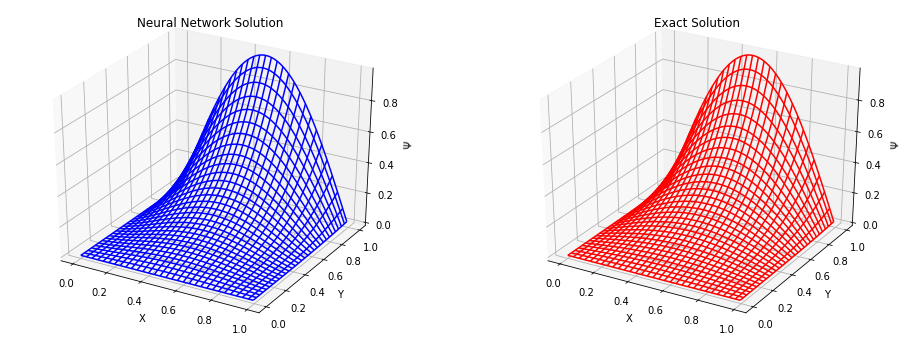

In [6]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot(1, 2, 1, projection='3d')
p = ax.plot_wireframe(Xtest, Ytest, ANNSoln, rstride=5, cstride=5, color='b')
ax.set_title('Neural Network Solution')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel(r'$\Psi$')

ax = fig.add_subplot(1, 2, 2, projection='3d')
p = ax.plot_wireframe(Xtest, Ytest, exactSoln, rstride=5, cstride=5, color='r')
ax.set_title('Exact Solution')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel(r'$\Psi$')